## Necessary Packages

In [2]:
library(lme4)
library(car)
library(effects)
# load data
data <- read.csv("tokyo_driftV2.csv")
data$resp = as.factor(data$resp)

Loading required package: Matrix



Loading required package: carData

Warning message:
"package 'effects' was built under R version 4.3.3"
lattice theme set by effectsTheme()
See ?effectsTheme for details.



## 1st Model

evidence prev_evidence     prev_resp 
     1.002906      1.356774      1.357608

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 | subj)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 40940.6  40983.5 -20465.3  40930.6    39063 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8195 -0.6095 -0.2669  0.6338  4.9562 

Random effects:
 Groups Name        Variance Std.Dev.
 subj   (Intercept) 0.339    0.5822  
Number of obs: 39068, groups:  subj, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.12601    0.08247  -1.528 0.126521    
evidence       2.04385    0.02228  91.719  < 2e-16 ***
prev_evidence -0.08503    0.02205  -3.855 0.000116 ***
prev_resp     -0.07891    0.01446  -5.456 4.86e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    

,npar,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
evidence,1,8367.24241,8367.24241,8367.24241
prev_evidence,1,59.88094,59.88094,59.88094
prev_resp,1,29.85903,29.85903,29.85903


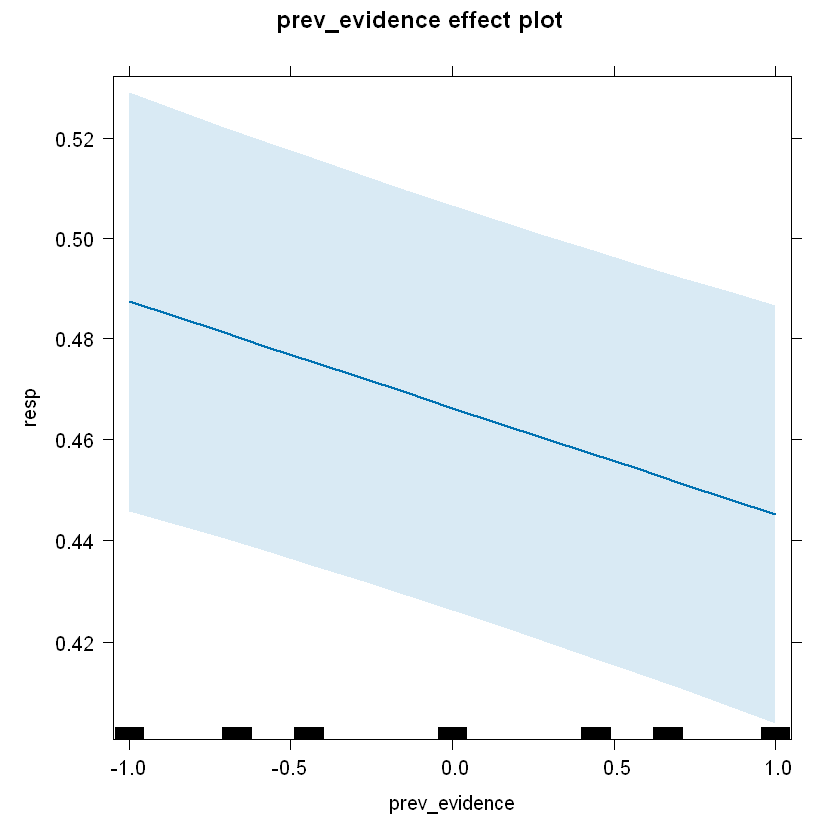

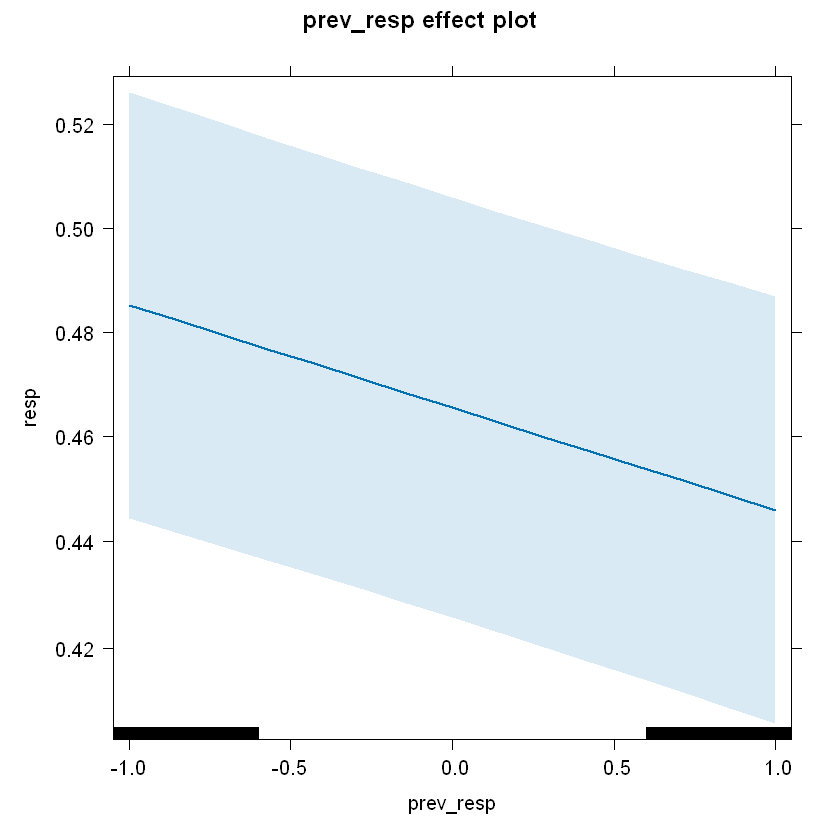

In [2]:
## Model 1 ####
m_AR0 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1|subj),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

vif(m_AR0)
summary(m_AR0)
anova(m_AR0)
plot(effect(c('prev_evidence'), m_AR0)) 
plot(effect(c('prev_resp'), m_AR0)) 

## 2nd Model

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR0,5,40940.65,40983.51,-20465.32,40930.65,NA,NA,NA
m_AR1,7,39961.62,40021.63,-19973.81,39947.62,983.0271,2,3.454444e-214


evidence prev_evidence     prev_resp 
     1.000148      1.317270      1.317314

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence |  
    subj)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39961.6  40021.6 -19973.8  39947.6    39061 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.5825 -0.6365 -0.1850  0.6389  8.0160 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 subj   (Intercept) 0.3777   0.6146        
        evidence    0.6150   0.7842   -0.22
Number of obs: 39068, groups:  subj, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.15057    0.08708  -1.729   0.0838 .  
evidence       2.17394    0.11251  19.322  < 2e-16 ***
prev_evidence -0.09252    0.02204  -4.197 2.70e-05 ***
prev_resp     -0.08300    0.01445  -5.744 9.24e-09 ***
---
Signif. codes:  0 '***' 0

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,373.32300,1,3.537390e-83
prev_evidence,17.61680,1,2.701906e-05
prev_resp,32.99555,1,9.237019e-09


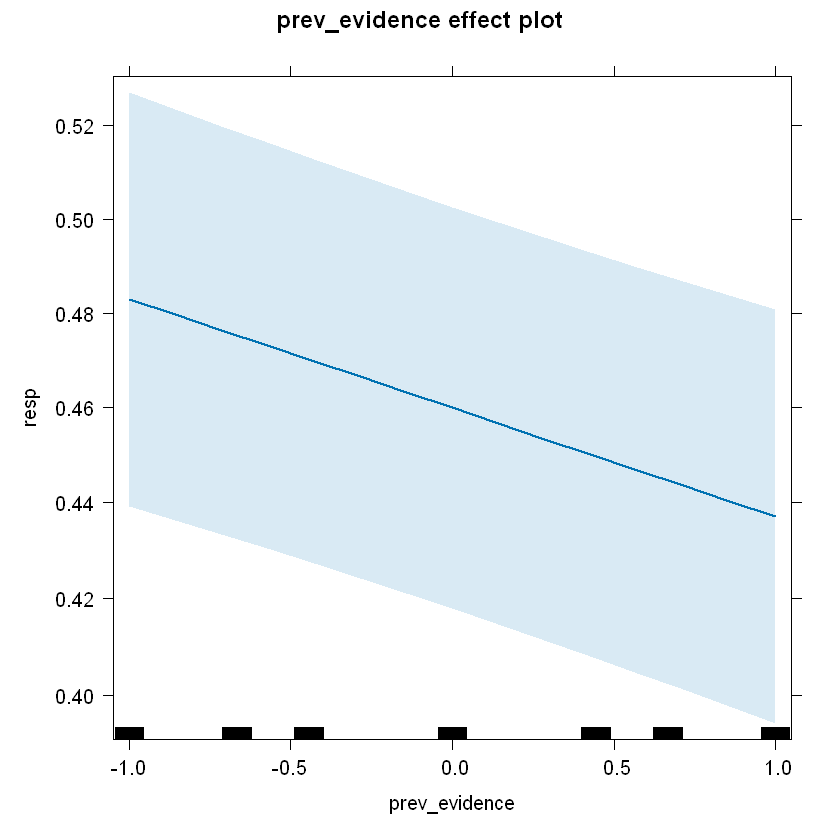

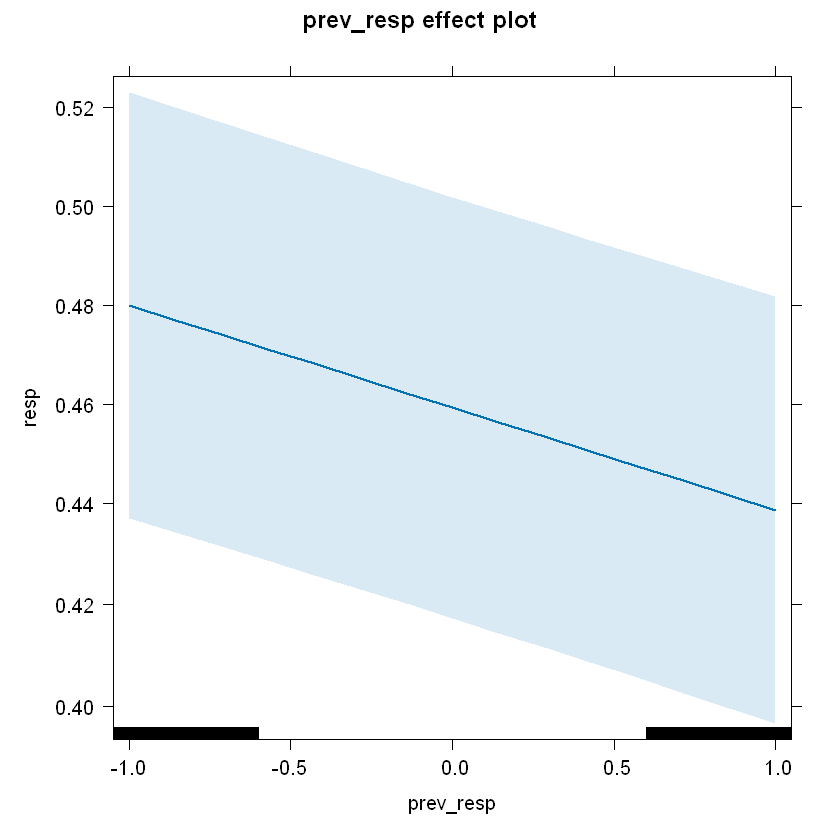

In [3]:
## Model 2 ####
m_AR1 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence|subj),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

anova(m_AR0, m_AR1)
vif(m_AR1)
summary(m_AR1)
Anova(m_AR1)
plot(effect(c('prev_evidence'), m_AR1)) 
plot(effect(c('prev_resp'), m_AR1)) 

## 3rd Model

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR1,7,39961.62,40021.63,-19973.81,39947.62,NA,NA,NA
m_AR2,10,39728.99,39814.72,-19854.50,39708.99,238.6265,3,1.885908e-51


evidence prev_evidence     prev_resp 
     1.482178      1.552824      1.072412

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence +  
    prev_evidence | subj)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39729.0  39814.7 -19854.5  39709.0    39058 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2778 -0.6207 -0.1774  0.6294  7.7583 

Random effects:
 Groups Name          Variance Std.Dev. Corr       
 subj   (Intercept)   0.3800   0.6164              
        evidence      0.6343   0.7964   -0.23      
        prev_evidence 0.1178   0.3433    0.23 -0.63
Number of obs: 39068, groups:  subj, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.15283    0.08732  -1.750  0.08006 .  
evidence       2.19802    0.11430  19.231  < 2e-16 ***
prev_evidence -0.15329    0.05333  -2.874  0.00

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,369.828327,1,2.039730e-82
prev_evidence,8.261484,1,4.049501e-03
prev_resp,15.688929,1,7.465988e-05


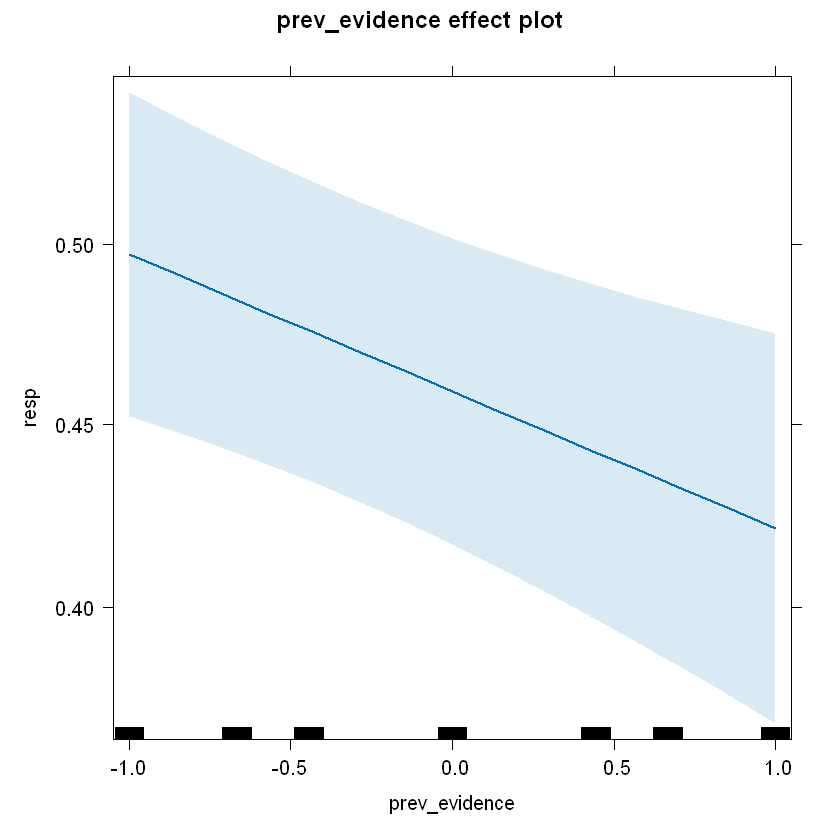

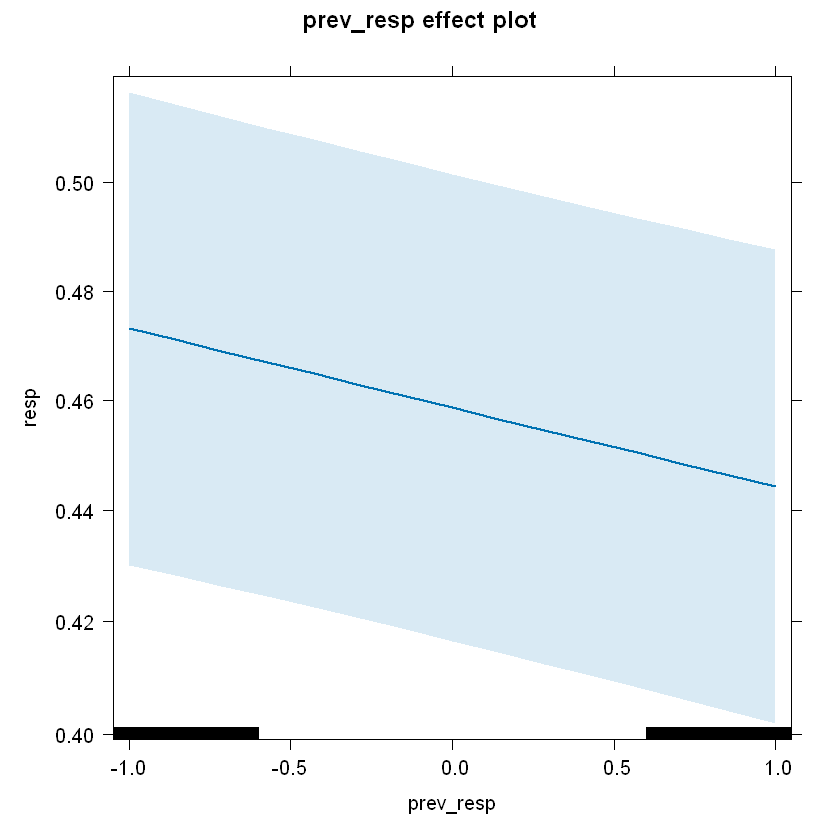

In [4]:
## Model 3 ####

m_AR2 <- glmer(data=data, resp ~ 
                 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence + prev_evidence|subj),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

anova(m_AR1, m_AR2)
vif(m_AR2)
summary(m_AR2)
Anova(m_AR2)
plot(effect(c('prev_evidence'), m_AR2))
plot(effect(c('prev_resp'), m_AR2))


## 4th Model

evidence prev_evidence     prev_resp 
     1.766646      1.850369      1.066787

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + (1 + evidence +  
    prev_evidence + prev_resp | subj)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 39550.1  39670.2 -19761.1  39522.1    39054 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.7972 -0.6176 -0.1731  0.6281  7.8103 

Random effects:
 Groups Name          Variance Std.Dev. Corr             
 subj   (Intercept)   0.3624   0.6020                    
        evidence      0.6433   0.8020   -0.27            
        prev_evidence 0.1050   0.3240    0.17 -0.75      
        prev_resp1    0.2478   0.4978   -0.16  0.06 -0.14
Number of obs: 39068, groups:  subj, 51

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.10187    0.08667  -1.175  0.23986    
evidence

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,368.807610,1,3.402636e-82
prev_evidence,9.109900,1,2.542297e-03
prev_resp,2.576581,1,1.084557e-01


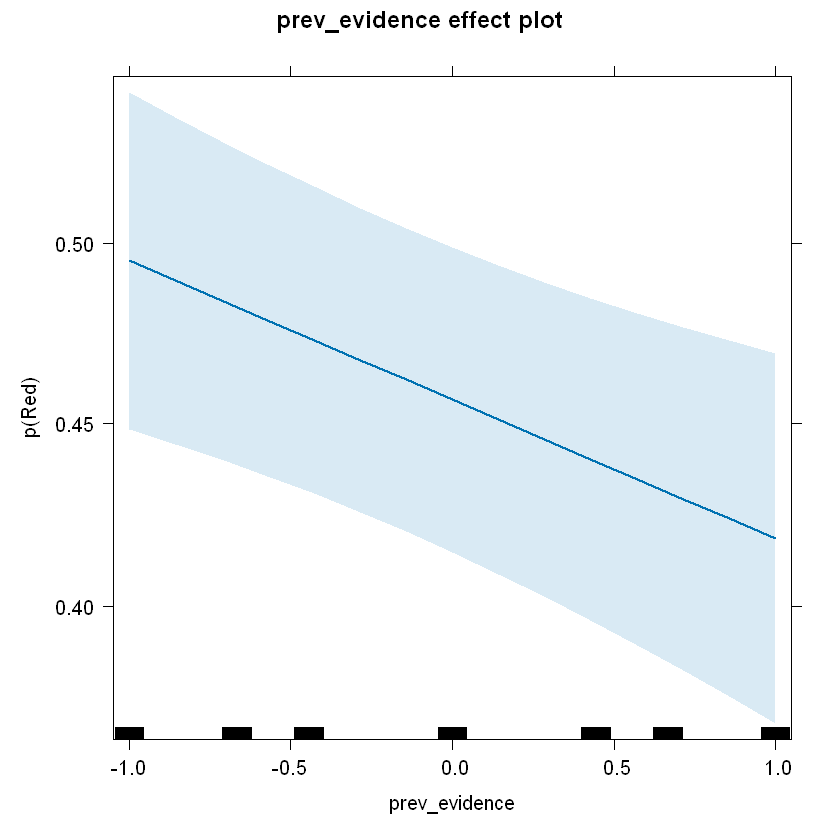

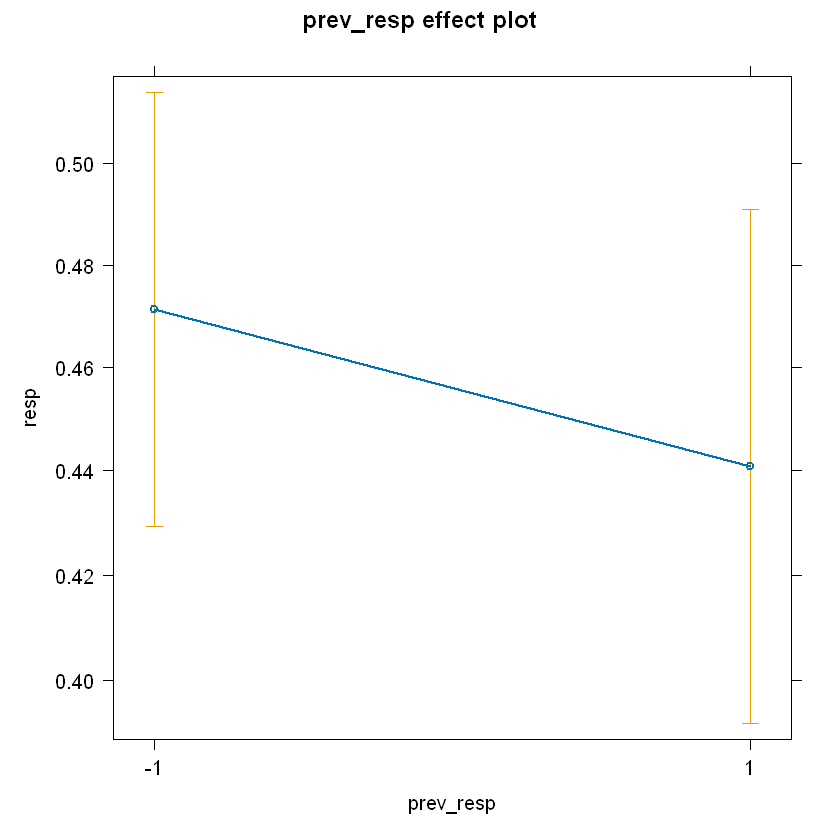

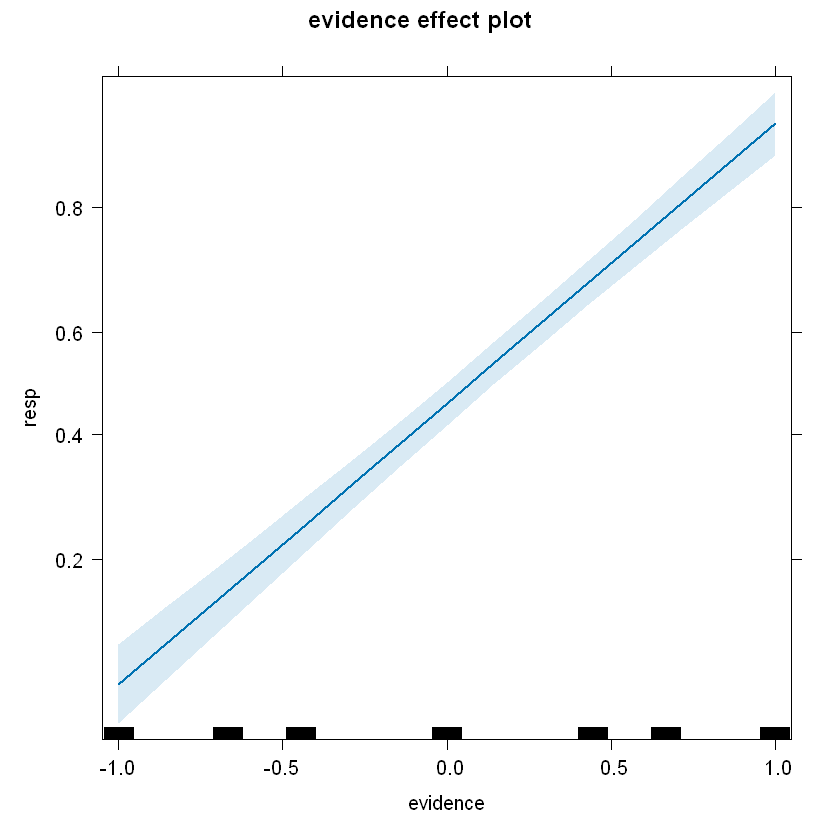

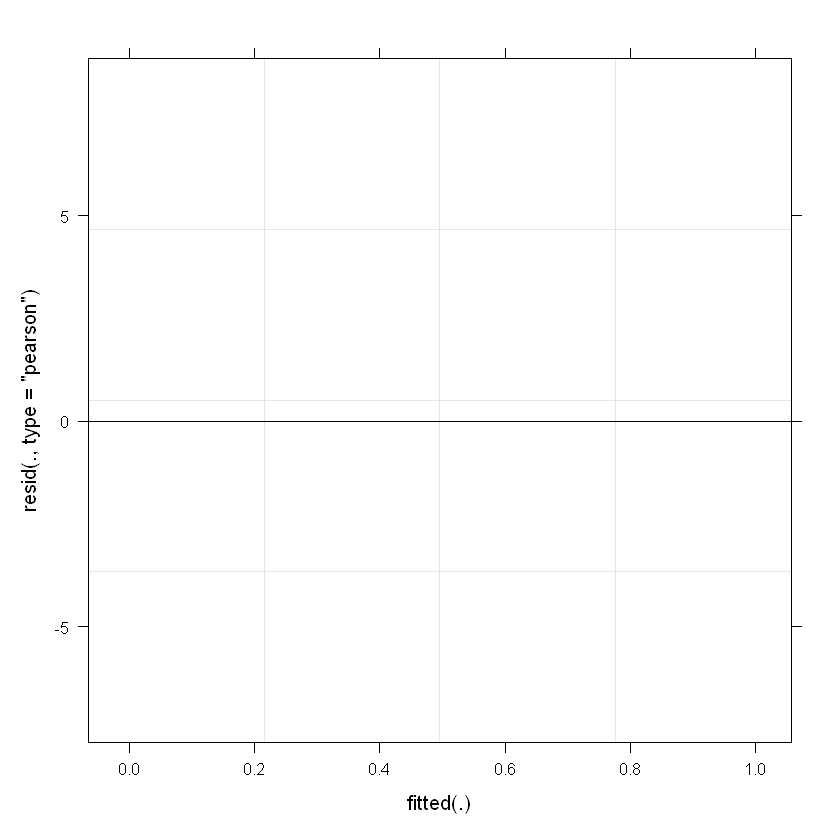

In [22]:
## Model 4 ####
data$prev_resp <- as.factor(data$prev_resp)
m_AR3 <- glmer(data=data, resp ~ 
                  # nolint
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 (1 + evidence + prev_evidence + prev_resp|subj),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

#anova(m_AR2, m_AR3)
vif(m_AR3)
summary(m_AR3)
Anova(m_AR3)
plot(effect(c('prev_evidence'), m_AR3), ylab = "p(Red)")
plot(effect(c('prev_resp'), m_AR3))
plot(effect(c('evidence'), m_AR3))

plot(m_AR3, type="re")

ERROR: Error in axis(1, at = 1:length(eff$levels[[1]]), labels = eff$levels[[1]]): plot.new has not been called yet


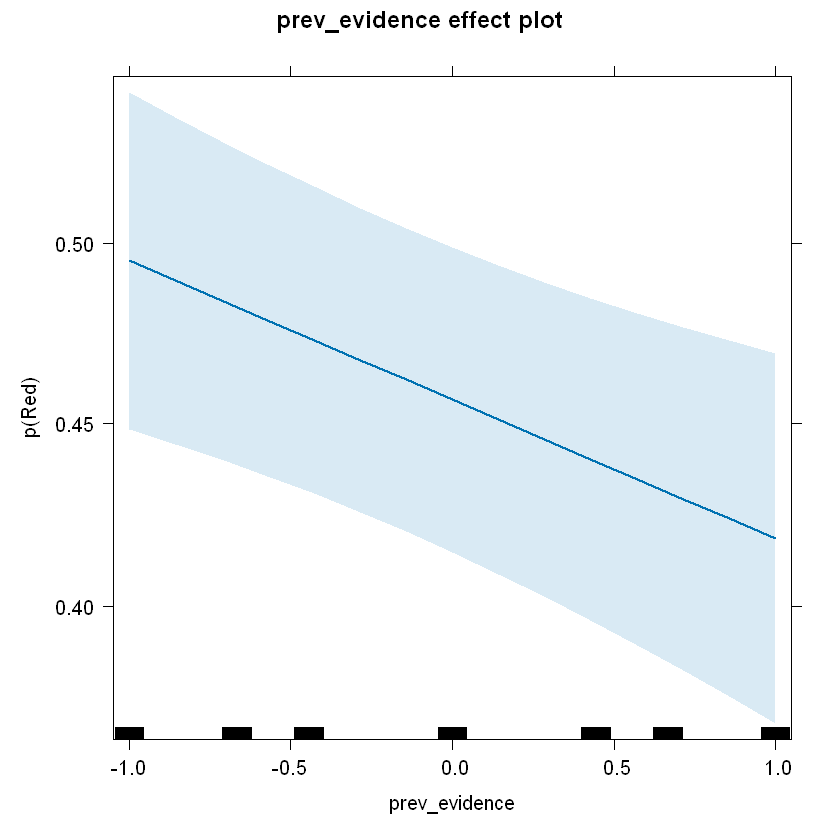

In [31]:
# Save the effect object
eff <- effect(c('prev_evidence'), m_AR3)

# Plot the effect
plot(eff, ylab = "p(Red)", xaxt = "n")  # xaxt = "n" suppresses the x-axis

# Add custom x-ticks using the axis function
axis(1, at = 1:length(eff$levels[[1]]), labels = eff$levels[[1]])

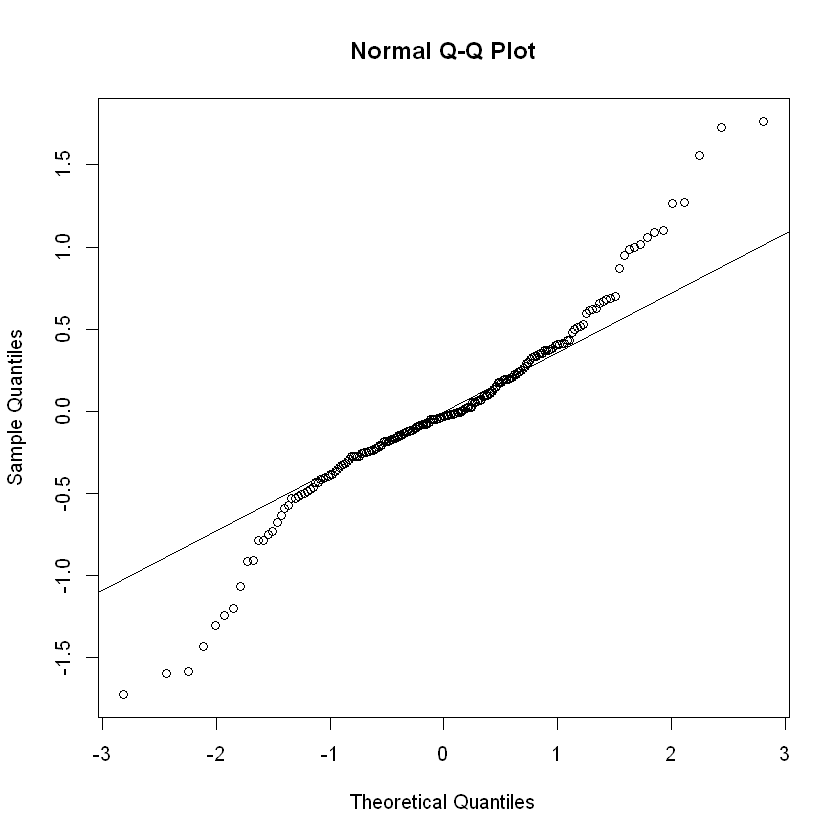

Warning message:
"package 'DHARMa' is in use and will not be installed"
plotSimulatedResiduals is deprecated, please switch your code to simply using the plot() function



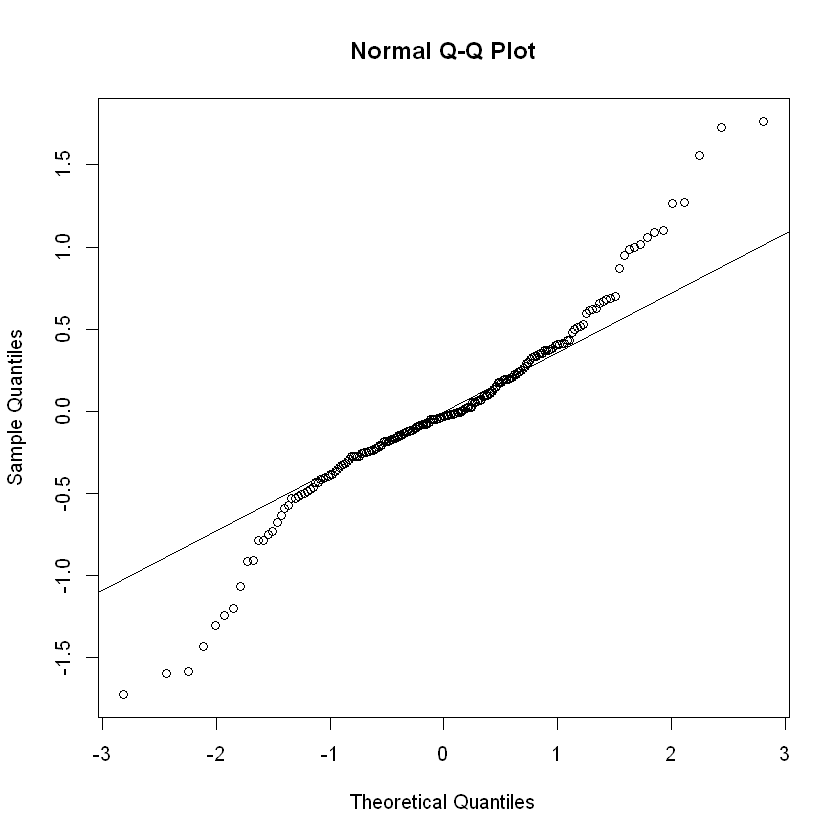

chisq        ratio          rdf            p 
3.768631e+04 9.649795e-01 3.905400e+04 9.999996e-01

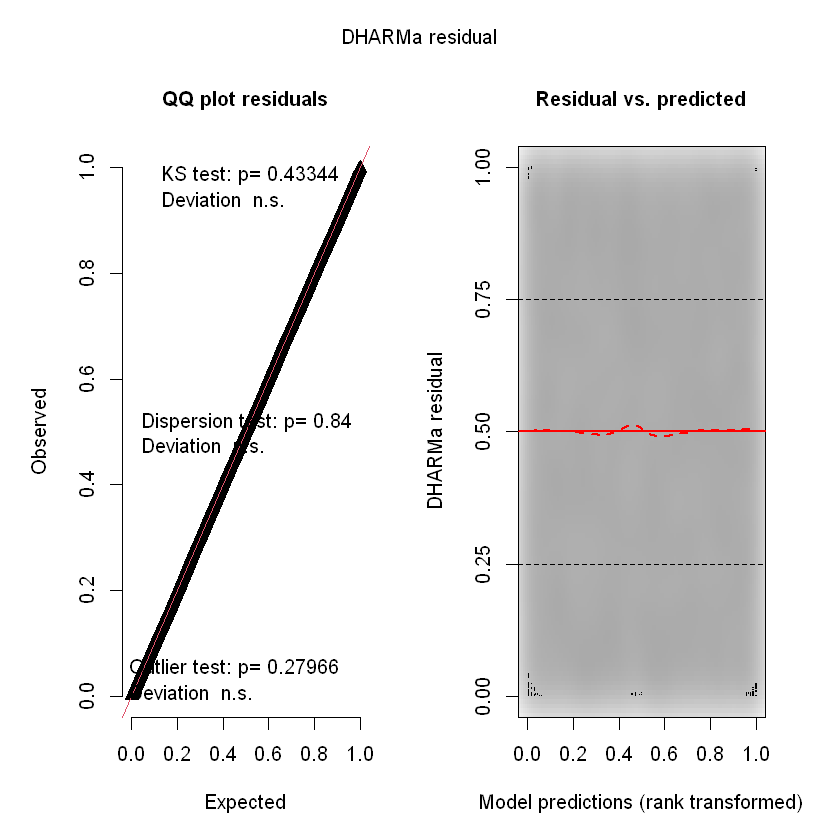

In [13]:
ranef_values <- ranef(m_AR3, condVar=TRUE)
qqnorm(unlist(ranef_values$subj))
qqline(unlist(ranef_values$subj))

ranef_values <- ranef(m_AR3, condVar=TRUE)
qqnorm(unlist(ranef_values$subj))
qqline(unlist(ranef_values$subj))

install.packages('DHARMa')
library(DHARMa)
simulated_res <- simulateResiduals(fittedModel = m_AR3)
plotSimulatedResiduals(simulated_res)

overdisp_fun <- function(model) {
  rdf <- df.residual(model)
  rp <- residuals(model, type = "pearson")
  Pearson.chisq <- sum(rp^2)
  prat <- Pearson.chisq / rdf
  pval <- pchisq(Pearson.chisq, df = rdf, lower.tail = FALSE)
  c(chisq = Pearson.chisq, ratio = prat, rdf = rdf, p = pval)
}
overdisp_fun(m_AR3)




In [64]:
# Load the ggplot2 package
library(ggplot2)

# Assuming you have already loaded the effects package and created m_AR3 model

# Define the resolution, size, and color
res <- 600  # Ultra high quality
size <- 3000  # Square size
color <- "#c9481d"  # replace "#c9481d" with your desired color

# Get the effects
eff_prev_evidence <- effect(c('prev_evidence'), m_AR3)
eff_prev_resp <- effect(c('prev_resp'), m_AR3)

# Convert the effects to data frames
df_prev_evidence <- as.data.frame(eff_prev_evidence)
df_prev_resp <- as.data.frame(eff_prev_resp)

# Plot the effect of 'prev_evidence' and save it
png("plot1.png", bg = "transparent", width = size, height = size, res = res)
ggplot(df_prev_evidence, aes(x=prev_evidence, y=fit)) +
  geom_line(color=color) +
  geom_ribbon(aes(ymin=lower, ymax=upper), fill=color, alpha=0.4) +
  theme(plot.background = element_rect(fill = "transparent", colour = NA),
        panel.background = element_rect(fill = "transparent", colour = NA),
        legend.background = element_rect(fill = "transparent", colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))
dev.off()

# Convert 'prev_resp' to numeric
df_prev_resp$prev_resp <- as.numeric(as.character(df_prev_resp$prev_resp))

# Plot the effect of 'prev_resp' and save it
png("plot2.png", bg = "transparent", width = size, height = size, res = res)
ggplot(df_prev_resp, aes(x=prev_resp, y=fit)) +
  geom_ribbon(aes(ymin=lower, ymax=upper), fill=color, alpha=0.4) +
  geom_point(color=color) +
  geom_line(color=color, group=1) +
  theme(plot.background = element_rect(fill = "transparent", colour = NA),
        panel.background = element_rect(fill = "transparent", colour = NA),
        legend.background = element_rect(fill = "transparent", colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "black"))
dev.off()

png 
  2

png 
  2

## TOKYO Drift

In [6]:
drift_data <- read.csv("df_tokyodriftV2.csv")

In [7]:
data <- data[order(data$subj), ]
data$slowdrift <- drift_data$slowdrift
data$prev_resp <- as.factor(data$prev_resp)

evidence prev_evidence     prev_resp     slowdrift 
     1.196408      1.106041      1.259520      1.115517

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp ~ evidence + prev_evidence + prev_resp + +slowdrift + (1 +  
    evidence + prev_evidence + prev_resp + slowdrift | subj)
   Data: data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 31091.6  31263.0 -15525.8  31051.6    39048 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-14.4673  -0.4300  -0.0616   0.4314  16.1297 

Random effects:
 Groups Name          Variance Std.Dev. Corr                   
 subj   (Intercept)   0.64211  0.8013                          
        evidence      1.32137  1.1495   -0.14                  
        prev_evidence 0.08684  0.2947    0.01 -0.31            
        prev_resp1    0.33207  0.5763   -0.09 -0.31  0.06      
        slowdrift     2.23815  1.4960   -0.03  0.02 -0.05 -0.30
Number of obs: 39068, groups:  subj, 51

Fixe

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
evidence,321.07301,1,8.456242e-72
prev_evidence,37.54369,1,8.938796e-10
prev_resp,224.62632,1,8.857520e-51
slowdrift,484.91709,1,1.818892e-107


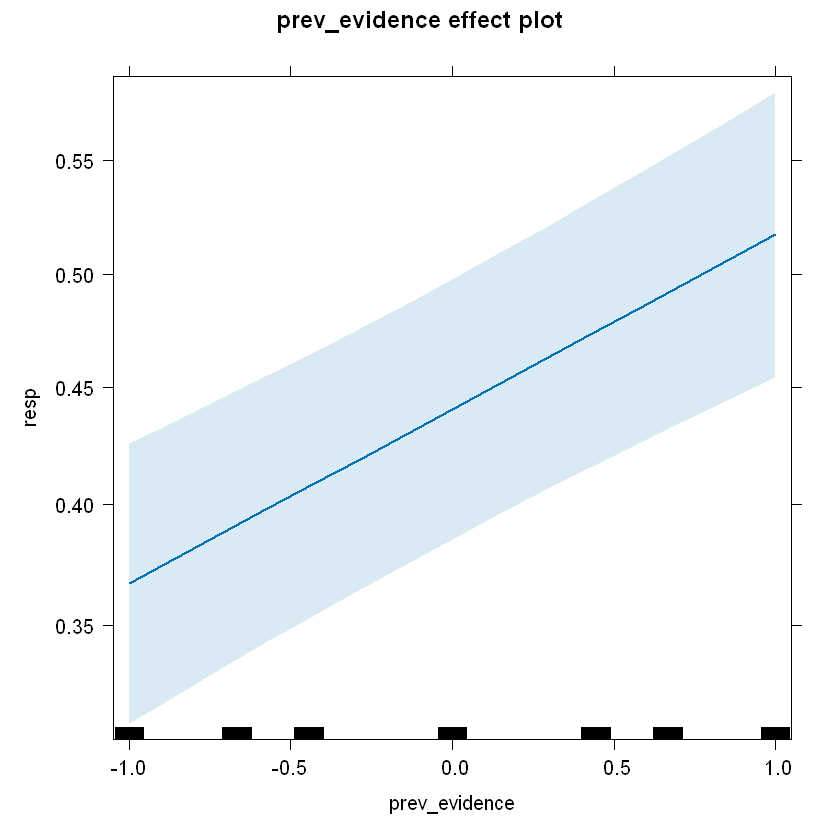

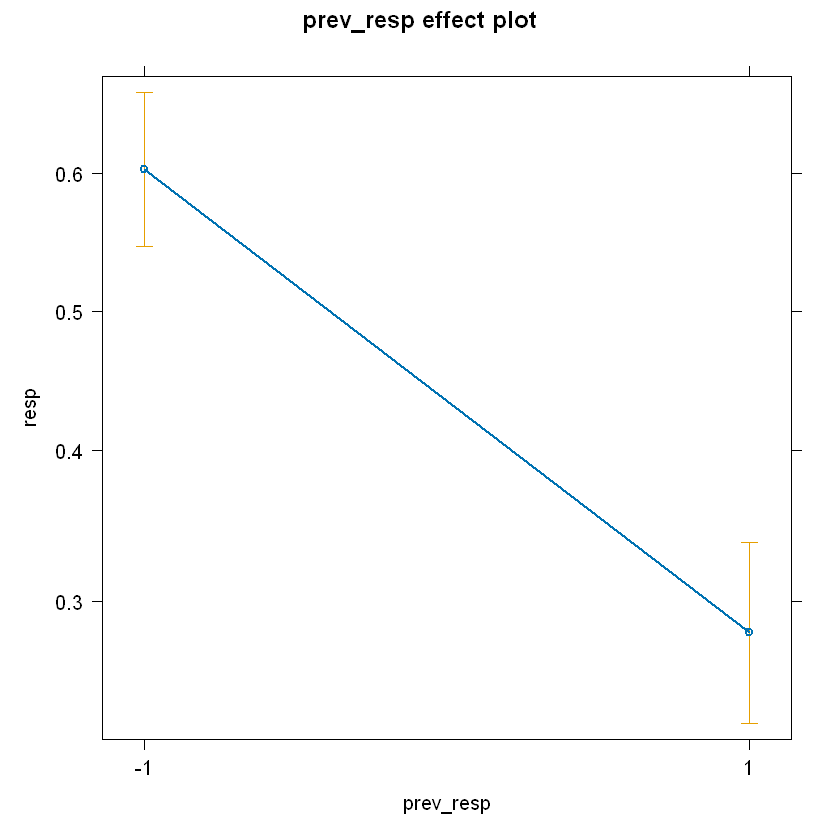

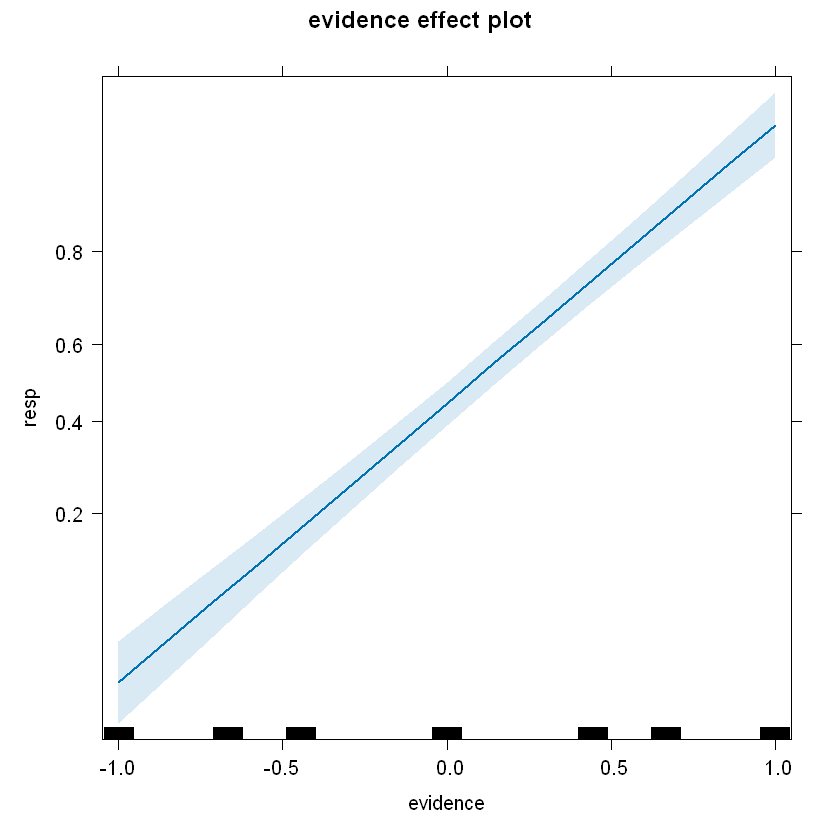

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_AR0,5,40940.65,40983.51,-20465.32,40930.65,NA,NA,NA
m_AR1,7,39961.62,40021.63,-19973.81,39947.62,983.0271,2,3.454444e-214
m_AR2,10,39728.99,39814.72,-19854.50,39708.99,238.6265,3,1.885908e-51
m_AR3,14,39550.14,39670.16,-19761.07,39522.14,186.8502,4,2.518093e-39
m_AR5,20,31091.58,31263.04,-15525.79,31051.58,8470.5605,6,0.000000e+00


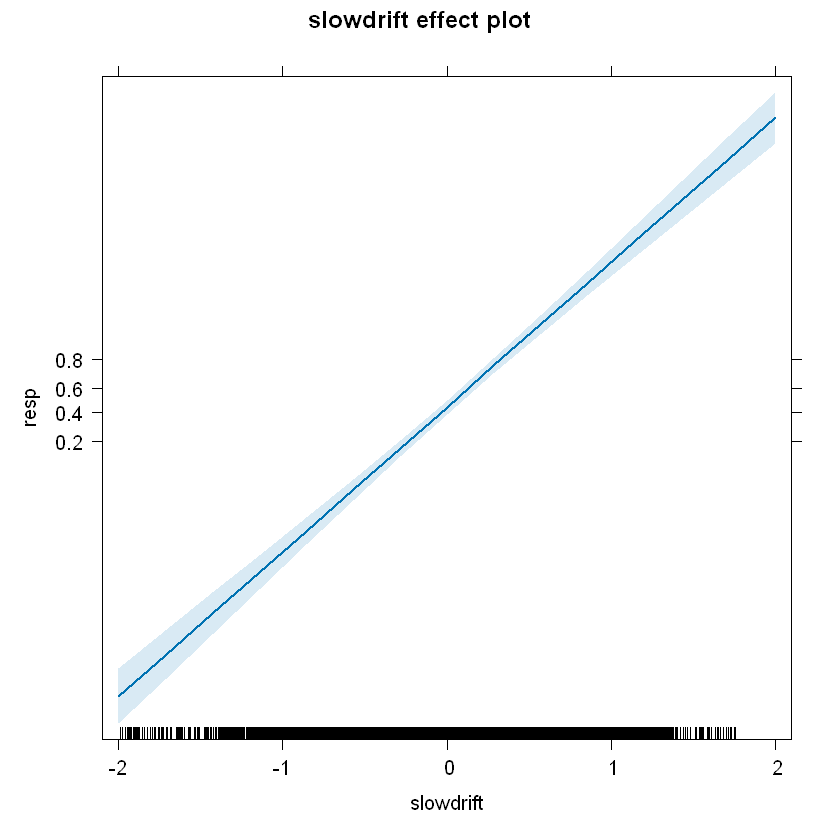

In [8]:
## Model 5 w slow drifts ####

m_AR5 <- glmer(data=data, resp ~ 
                 evidence +
                 prev_evidence + 
                 prev_resp +
                 + slowdrift +
                 (1 + evidence + prev_evidence + prev_resp + slowdrift|subj),
               family = binomial,control=glmerControl(optimizer='bobyqa',optCtrl = list(maxfun=100000)))

#anova(m_AR3, m_AR5)
vif(m_AR5)
summary(m_AR5)
Anova(m_AR5)
plot(effect(c('prev_evidence'), m_AR5))
plot(effect(c('prev_resp'), m_AR5))
plot(effect(c('evidence'), m_AR5))
plot(effect(c('slowdrift'), m_AR5))

anova(m_AR0, m_AR1, m_AR2, m_AR3, m_AR5)